# Antimalarial drug discovery using AI

This notebook exemplifies how several AI models could be used to filter a dataset to select the best antimalarial hits. It also focuses on understanding the differences between synthetic and natural product datasets

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap

DATAPATH = "../data/m1_datasets"
FIGUREPATH = "../figures/m1"

/Users/gemmaturon/anaconda3/envs/ml/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
ch = pd.read_csv(os.path.join(DATAPATH, "chembl_selected.csv"))
co = pd.read_csv(os.path.join(DATAPATH, "coconut_selected.csv"))

In [16]:
from rdkit import Chem
from rdkit.Chem.Descriptors import qed
from rdkit.Chem.Descriptors import ExactMolWt
from rdkit.Chem.Descriptors import MolLogP

# Calculate Relevant PHYSCHEM

allsmiles = ch["smiles"].tolist()
allmols = [Chem.MolFromSmiles(smi) for smi in allsmiles]
ch["mw"] = [ExactMolWt(mol) for mol in allmols]
ch["logp"] = [MolLogP(mol) for mol in allmols]
ch["qed"] = [qed(mol) for mol in allmols]

In [23]:
allsmiles = co["smiles"].tolist()
allmols = [Chem.MolFromSmiles(smi) for smi in allsmiles]
co["mw"] = [ExactMolWt(mol) for mol in allmols]
co["logp"] = [MolLogP(mol) for mol in allmols]
co["qed"] = [qed(mol) for mol in allmols]

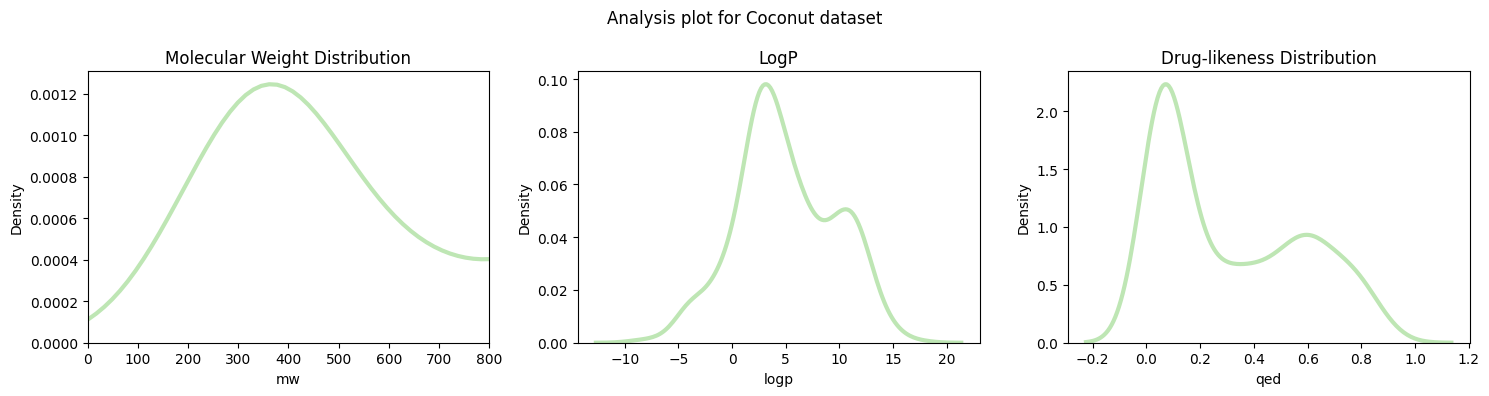

In [24]:
import seaborn as sns
k = co
v=co
fig, ax = plt.subplots(1,3, figsize=(15,4))
fig.suptitle("Analysis plot for Coconut dataset")

ax0 = ax[0]
ax1 = ax[1]
ax2 = ax[2]


sns.kdeplot(v["mw"], ax=ax0, color = "#bee6b4", lw=3 )
ax0.set_title("Molecular Weight Distribution")
ax0.set_xlim(0,800)

sns.kdeplot(v["logp"], ax=ax1, color = "#bee6b4", lw=3)
ax1.set_title("LogP")

sns.kdeplot(v["qed"], ax=ax2, color = "#bee6b4", lw=3)
ax2.set_title("Drug-likeness Distribution")


plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH, "coconut_selected_chemistry.png"), dpi=300)

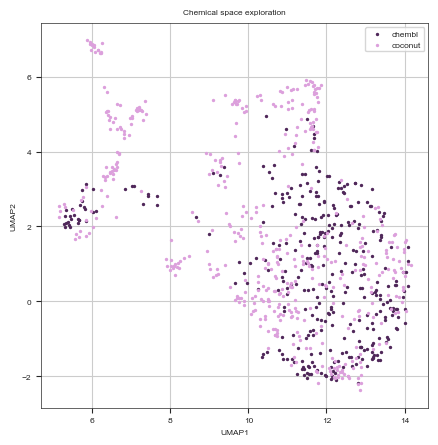

In [62]:
from lazyqsar.descriptors.descriptors import ErsiliaCompoundEmbeddings
from umap import UMAP

desc = ErsiliaCompoundEmbeddings()
ch_descs = desc.transform(ch["smiles"])
co_descs = desc.transform(co["smiles"])

reducer = UMAP()
reducer.fit(np.vstack([ch_descs, co_descs]))
umap_ch = reducer.transform(ch_descs)
umap_co = reducer.transform(co_descs)

fig,ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(umap_ch[:,0], umap_ch[:,1], c="#50285a", s=2, label="chembl")
ax.scatter(umap_co[:,0], umap_co[:,1], c="#dca0dc", s=2, label="coconut")
ax.set_title("Chemical space exploration")
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")
ax.legend()
plt.savefig(os.path.join(FIGUREPATH,"umap_chembl_coconut.png"), dpi=300)

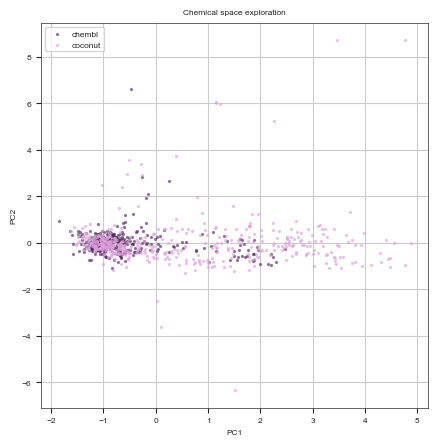

In [67]:
from sklearn.decomposition import PCA

desc = ErsiliaCompoundEmbeddings()
ch_descs = desc.transform(ch["smiles"])
co_descs = desc.transform(co["smiles"])

reducer = PCA(n_components=4)
reducer.fit(np.vstack([ch_descs, co_descs]))
pca_ch = reducer.transform(ch_descs)
pca_co = reducer.transform(co_descs)

fig,ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(pca_ch[:,0], pca_ch[:,1], c="#50285a", alpha =0.5, s=2, label="chembl")
ax.scatter(pca_co[:,0], pca_co[:,1], c="#dca0dc",alpha =0.5, s=2, label="coconut")
ax.set_title("Chemical space exploration")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend()
plt.savefig(os.path.join(FIGUREPATH,"pca_chembl_coconut.png"), dpi=300)

# Results analysis

In [52]:
import stylia as st
from stylia import NamedColors
from stylia import TWO_COLUMNS_WIDTH

named_colors = NamedColors()
red = named_colors.get('red')
blue = named_colors.get('blue')
gray = named_colors.get('gray')

### eos4rta

In [115]:
ch_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "chembl_selected_eos4rta_predictions.csv"))
co_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "coconut_selected_eos4rta_predictions.csv"))

cols = list(ch_preds.columns)
cols.remove('input')
cols.remove('key')


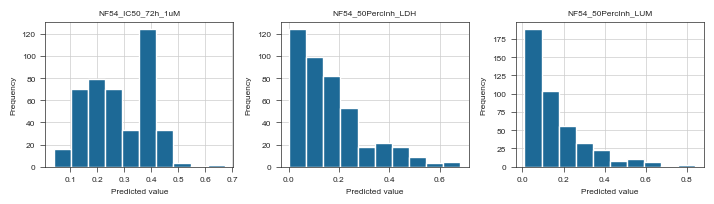

In [116]:
fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = ch_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"ersilia_model_preds","eos4rta_chembl_selected.png"), dpi=300)

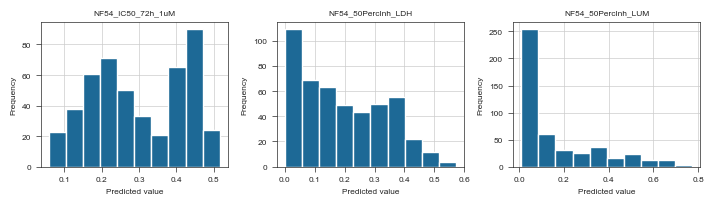

In [117]:
fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = co_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"ersilia_model_preds","eos4rta_coconut_selected.png"), dpi=300)

### eos7yti

In [118]:
ch_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "chembl_selected_eos7yti_predictions.csv"))
co_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "coconut_selected_eos7yti_predictions.csv"))

cols = list(ch_preds.columns)
cols.remove('key')
cols.remove('input')

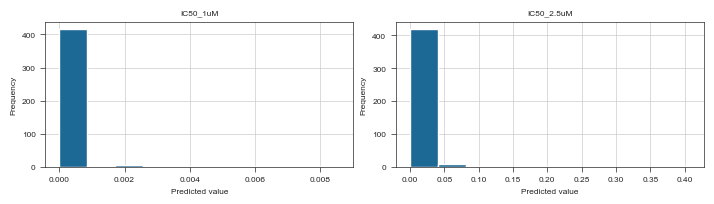

In [119]:
fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = ch_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"ersilia_model_preds","eos7yti_chembl_selected.png"), dpi=300)

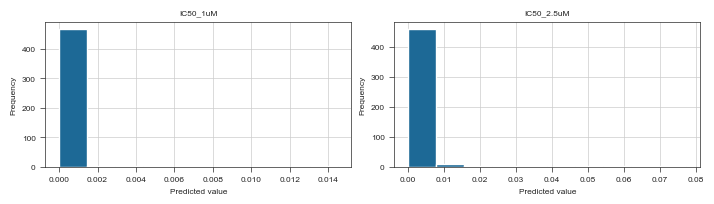

In [120]:
fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = co_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"ersilia_model_preds","eos7yti_coconut_selected.png"), dpi=300)

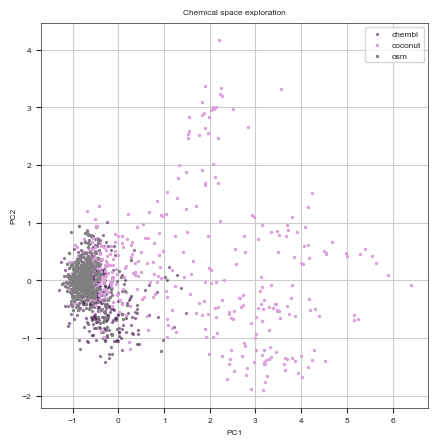

In [121]:
from sklearn.decomposition import PCA
from lazyqsar.descriptors.descriptors import ErsiliaCompoundEmbeddings

train = pd.read_csv(os.path.join(DATAPATH, "osm_all.csv"))

desc = ErsiliaCompoundEmbeddings()
train_descs = desc.transform(train["smiles"])
ch_descs = desc.transform(ch_preds["input"])
co_descs = desc.transform(co_preds["input"])

reducer = PCA(n_components=2)
reducer.fit(np.vstack([train_descs,ch_descs, co_descs]))
pca_train = reducer.transform(train_descs)
pca_ch = reducer.transform(ch_descs)
pca_co = reducer.transform(co_descs)

fig,ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(pca_ch[:,0], pca_ch[:,1], c="#50285a", alpha=0.5, s=2, label="chembl")
ax.scatter(pca_co[:,0], pca_co[:,1], c="#dca0dc", s=2, label="coconut")
ax.scatter(pca_train[:,0], pca_train[:,1], c="gray", s=2, label="osm")
ax.set_title("Chemical space exploration")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend()
plt.savefig(os.path.join(FIGUREPATH,"pca_osm.png"), dpi=300)

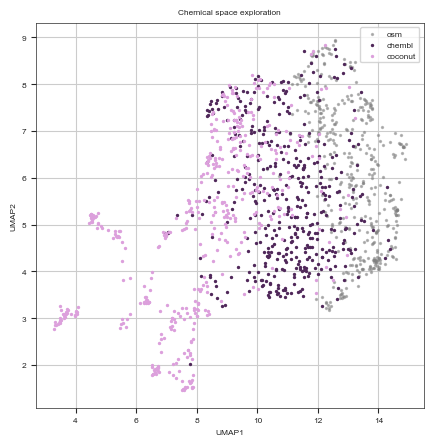

In [122]:
from umap import UMAP
from lazyqsar.descriptors.descriptors import ErsiliaCompoundEmbeddings

train = pd.read_csv(os.path.join(DATAPATH, "osm_all.csv"))

desc = ErsiliaCompoundEmbeddings()
train_descs = desc.transform(train["smiles"])
ch_descs = desc.transform(ch_preds["input"])
co_descs = desc.transform(co_preds["input"])

reducer = UMAP()
reducer.fit(np.vstack([train_descs, ch_descs, co_descs]))
pca_train = reducer.transform(train_descs)
pca_ch = reducer.transform(ch_descs)
pca_co = reducer.transform(co_descs)

fig,ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(pca_train[:,0], pca_train[:,1], c="gray",alpha=0.5, s=2, label="osm")
ax.scatter(pca_ch[:,0], pca_ch[:,1], c="#50285a", s=2, label="chembl")
ax.scatter(pca_co[:,0], pca_co[:,1], c="#dca0dc", s=2, label="coconut")
ax.set_title("Chemical space exploration")
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")
ax.legend()
plt.savefig(os.path.join(FIGUREPATH,"umap_osm.png"), dpi=300)

### eos4e41

In [123]:
ch_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "chembl_selected_eos4e41_predictions.csv"))
co_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "coconut_selected_eos4e41_predictions.csv"))

cols = list(ch_preds.columns)
cols.remove('input')
cols.remove('key')

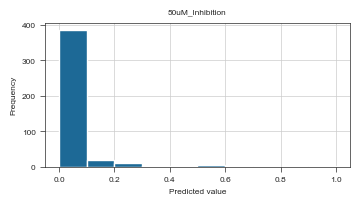

In [124]:
fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH/2, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = ch_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"ersilia_model_preds","eos4e41_chembl_selected.png"), dpi=300)

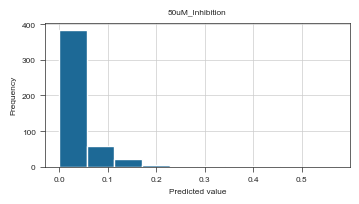

In [125]:
fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH/2, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = co_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"ersilia_model_preds","eos4e41_coconut_selected.png"), dpi=300)

In [126]:
ch_preds.sort_values(by = "50uM_Inhibition", ascending=False)

,key,input,50uM_Inhibition
116,PAGNERNSMOUOJL-MRVPVSSYSA-N,COC1=C(N2CC[C@@H](N)C2)C(F)=CC2=C1N(C1CC1)C1=C...,9.988469e-01
29,ZLGSQILIYXYAOK-MHECFPHRSA-N,CC1=CN([C@H]2C=C[C@@H](COC(=O)CN3CCN(C4=CC5=C(...,9.879495e-01
248,GJPQKIQISJHKEA-QPPQHZFASA-N,C[C@H]1O[C@@H](N2C=C(F)C(=O)NC2=O)C[C@H]1O,9.007762e-01
101,AQMNBSBCJPFTAD-ZAZKALAHSA-N,O=NN(CCCl)C(=O)N[C@@H]1CC(N2C=C(F)C(=O)NC2=O)O...,6.431875e-01
247,MFVWETVYCQYWBB-PXLXIMEGSA-N,NC(N)=N/N=C1\C2=CC(Cl)=CC=C2CC1SC1=NC2=CC=CC=C2S1,5.887786e-01
...,...,...,...
360,AQGQIEMZZCPJGG-QZXDNJHYSA-N,CCC(=O)O[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]...,2.474114e-05
50,JBYWTQVZDGPHNS-DQSJHHFOSA-N,CC/C(=C(\C1=CC=C(I)C=C1)C1=CC=C(OCCN(CC)CC)C=C...,2.399065e-05
358,NFJNDYWXSUDTHS-ROCBYOHGSA-N,CCN(C1=CC=CC=C1)S(=O)(=O)[C@H]1C[C@H]2O[C@@H]1...,2.248055e-05
238,FMJPKFAJUQLTTM-VCDODJMISA-N,C[C@]12CC[C@H]3[C@@H](CC[C@H]4C[C@]5(CC[C@]34C...,1.349291e-05


In [127]:
co_preds.sort_values(by = "50uM_Inhibition", ascending=False)

,key,input,50uM_Inhibition
431,QOBWAHGNXHPTJC-UHFFFAOYSA-N,O=C1C2=CC=3OCOC3C=C2C4=CC(=CC(OC(CO)CO)=C4N1CC...,0.569909
216,WGVQVFNAGYFBEO-UHFFFAOYSA-N,O=C(O)CNC(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)C...,0.420989
34,PLVFNMQHMRRBAA-UHFFFAOYSA-N,FC=1N=C(F)C(F)=C(N)C1F,0.410277
119,DKZXTOPFCDDGGX-UHFFFAOYSA-N,N=1C=NC2=NC=NC3=NC=NC1N23,0.338557
321,CUVIKLNIJJAXLF-UHFFFAOYSA-N,O=C1C(C(=O)C2(C)C(C=CC3CC(C)CCC32)C)=C(O)C(N1C...,0.324449
...,...,...,...
101,SZYQWSMUBODLBB-UHFFFAOYSA-N,O=C1C2(CN3CC1(CN(C2)C3C=4C=CN=CC4)CC)CC,0.000099
256,WOWABSUZFYHFEO-UHFFFAOYSA-N,N#CCCN1CCN(C)CCCSCCSCCC1,0.000086
55,OXQGTIUCKGYOAA-UHFFFAOYSA-N,O=C(O)C(CC)CC,0.000073
239,ZDGJAHTZVHVLOT-UHFFFAOYSA-N,O=C(O)CCC(NCCCCC(N)C(=O)O)C(=O)O,0.000071


### eos2l0q

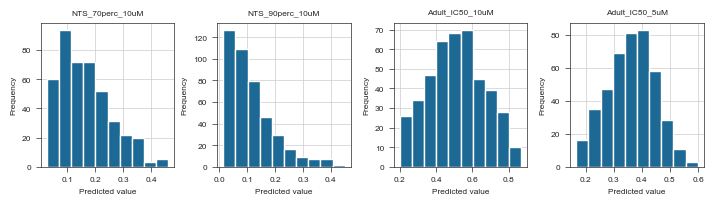

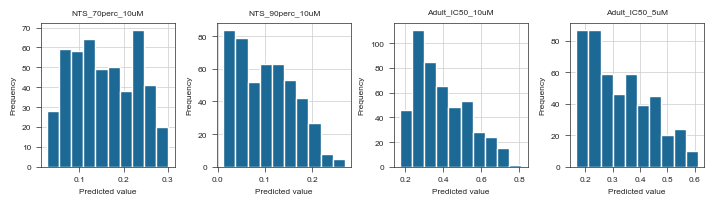

In [128]:
m = "eos2l0q"
ch_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "chembl_selected_{}_predictions.csv".format(m)))
co_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "coconut_selected_{}_predictions.csv".format(m)))

cols = list(ch_preds.columns)
cols.remove('input')
cols.remove('key')

fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = ch_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"{}_chembl_selected.png".format(m)), dpi=300)

fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = co_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"ersilia_model_preds","{}_coconut_selected.png".format(m)), dpi=300)

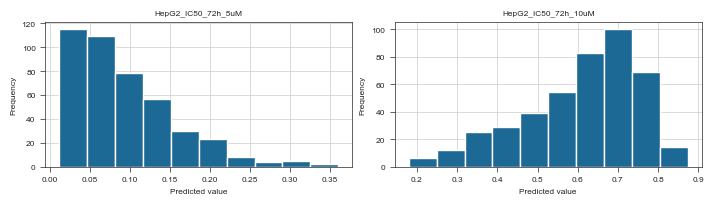

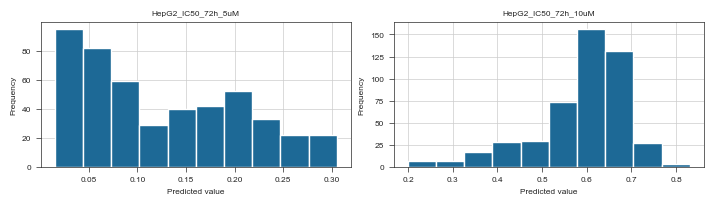

In [129]:
m = "eos3le9"
ch_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "chembl_selected_{}_predictions.csv".format(m)))
co_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "coconut_selected_{}_predictions.csv".format(m)))

cols = list(ch_preds.columns)
cols.remove('input')
cols.remove('key')

fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = ch_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"{}_chembl_selected.png".format(m)), dpi=300)

fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = co_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"ersilia_model_preds","{}_coconut_selected.png".format(m)), dpi=300)

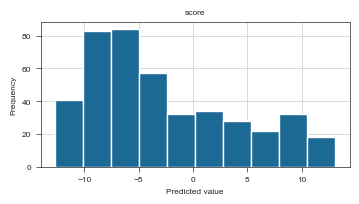

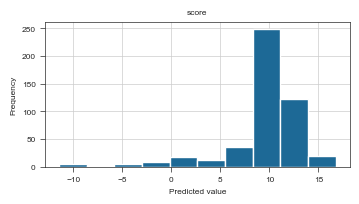

In [130]:
m = "eos9yui"
ch_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "chembl_selected_{}_predictions.csv".format(m)))
co_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "coconut_selected_{}_predictions.csv".format(m)))

cols = list(ch_preds.columns)
cols.remove('input')
cols.remove('key')

fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH/2, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = ch_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"{}_chembl_selected.png".format(m)), dpi=300)

fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH/2, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = co_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"ersilia_model_preds","{}_coconut_selected.png".format(m)), dpi=300)

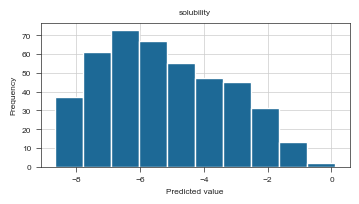

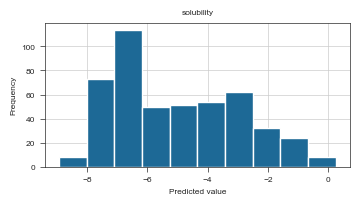

In [131]:
m = "eos6oli"
ch_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "chembl_selected_{}_predictions.csv".format(m)))
co_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "coconut_selected_{}_predictions.csv".format(m)))

cols = list(ch_preds.columns)
cols.remove('input')
cols.remove('key')

fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH/2, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = ch_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"{}_chembl_selected.png".format(m)), dpi=300)

fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH/2, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = co_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"ersilia_model_preds","{}_coconut_selected.png".format(m)), dpi=300)

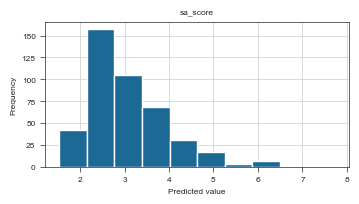

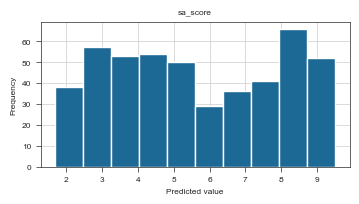

In [132]:
m = "eos9ei3"
ch_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "chembl_selected_{}_predictions.csv".format(m)))
co_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "coconut_selected_{}_predictions.csv".format(m)))

cols = list(ch_preds.columns)
cols.remove('input')
cols.remove('key')

fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH/2, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = ch_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"{}_chembl_selected.png".format(m)), dpi=300)

fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH/2, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = co_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"ersilia_model_preds","{}_coconut_selected.png".format(m)), dpi=300)

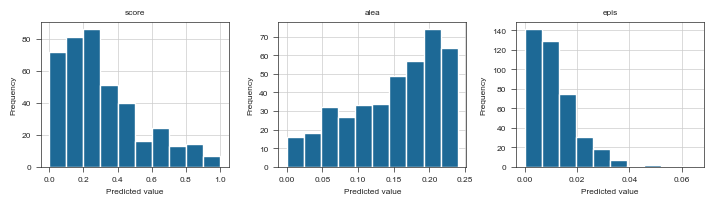

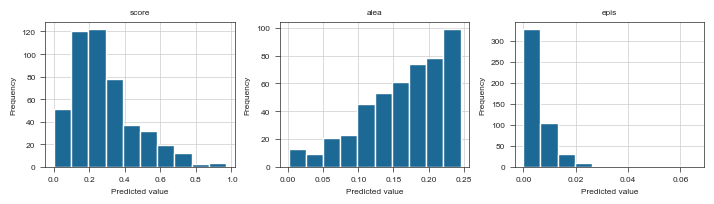

In [133]:
m = "eos4tcc"
ch_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "chembl_selected_{}_predictions.csv".format(m)))
co_preds = pd.read_csv(os.path.join(DATAPATH, "precalculations", "coconut_selected_{}_predictions.csv".format(m)))

cols = list(ch_preds.columns)
cols.remove('input')
cols.remove('key')

fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = ch_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"{}_chembl_selected.png".format(m)), dpi=300)

fig, axs = st.create_figure(1,len(cols), width=TWO_COLUMNS_WIDTH, height=2)
for i in range(len(cols)):
    ax = axs[i]
    values = co_preds[cols[i]]
    ax.hist(values, color=blue)
    st.label(
        ax,
        title="{}".format(cols[i]),
        xlabel="Predicted value",
        ylabel="Frequency",
        )
    plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH,"ersilia_model_preds","{}_coconut_selected.png".format(m)), dpi=300)

## Master file

In [134]:
# columns of interest

cols = {
    "eos4rta":"NF54_IC50_72h_1uM",
    "eos7yti": "IC50_2.5uM",
    "eos4e41": "50uM_Inhibition",
    "eos2l0q": "NTS_90perc_10uM",
    "eos3le9": "HepG2_IC50_72h_10uM",
    "eos4tcc": "score",
    "eos6oli": "solubility",
    "eos9yui":"score",
    "eos9ei3":"sa_score",
}

In [135]:
ch = pd.read_csv(os.path.join(DATAPATH, "chembl_selected.csv"))
mf = ch[["inchikey","smiles"]]
for k,v in cols.items():
    df = pd.read_csv(os.path.join(DATAPATH, "precalculations", "chembl_selected_{}_predictions.csv".format(k)))
    mf[k]=df[v]
mf.to_csv(os.path.join(DATAPATH, "chembl_selected_predictions.csv"), index=False)

In [136]:
ch = pd.read_csv(os.path.join(DATAPATH, "coconut_selected.csv"))
mf = ch[["inchikey","smiles"]]
for k,v in cols.items():
    df = pd.read_csv(os.path.join(DATAPATH, "precalculations", "coconut_selected_{}_predictions.csv".format(k)))
    mf[k]=df[v]
mf.to_csv(os.path.join(DATAPATH, "coconut_selected_predictions.csv"), index=False)

In [4]:
#get reduced master file
data = ["chembl", "coconut"]
for d in data:
    df = pd.read_csv(os.path.join(DATAPATH, "{}_selected_predictions.csv".format(d)))
    df = df[["inchikey","smiles","eos4rta","eos7yti","eos3le9","eos4tcc","eos6oli","eos9yui","eos9ei3"]]
    df.to_csv(os.path.join(DATAPATH, "{}_selected_predictions_red.csv".format(d)), index=False)

## Select molecules

In [3]:
ch = pd.read_csv(os.path.join(DATAPATH, "chembl_selected_predictions.csv"))
ch.sort_values(by="eos4rta", ascending=False, inplace=True)
print(ch["smiles"].tolist())

In [8]:
co = pd.read_csv(os.path.join(DATAPATH, "coconut_selected_predictions.csv"))
co.sort_values(by="eos4rta", ascending=False, inplace=True)
print(co["smiles"].tolist())
co["smiles"].tolist()[2]

['O=C1OC(C=2C=COC2CC(C(O)CO)C3CCC4C(C=CN5CNCC54)C3)C6(C)CC7CC89CCCC9CC%10=CC%11C%12(OC%10%13C8C(=O)OCC%14%13C%12C(=O)C(O)C(C)(C7%14)C%156OC1%15)CCCC%16%11CCC%17CCCCC%17C%16C', 'O=C1OC(C=2C=COC2CC(C(O)CO)C3CCC4C(C=CN5CNCC54)C3)C6(C)CC7CC89CC%10(CCCC%10)CC9CC%11=CC%12C%13(OC%11%14C8C(=O)OCC%15%14C%13C(=O)C(O)C(C%16CCCC(CC=%17C=CC=CC%17)C%16)(C7%15)C%186OC1%18)CCCC%19%12C=CC%20CCCCC%20C%19C', 'O=C1OC(CC)C(C2C#CCC3CC4(O)C5=C6NC(C(=O)CC(C7=CC=C(O)C=C7)CSSCC8C(O)C(O)CC(C)(C5CCC4(CCN=C(N)N)C3C(O)(C)C(O)CC(C)C9CC=C%10CCC(C)CC%10C9C2)C8(C6=O)CCCCC)CO)C1C=%11C=CNC%11', 'O=C1OCC23C4C(=O)C(O)C5(C6CCCCC6)C3C(CC78CCCC8CC9=CCC4(OC92C17)C%10CCCCC%10)CC%11(C)C(OC(=O)C%12OC%12%115)C=%13C=COC%13CC(C(O)CO)C%14CCC%15C(C=CN%16CNCC%16%15)C%14', 'O=C(CCC1=CC=C(O)C(OCN)=C1)C2CC(CC3=CC=C(O)C=C3O)C4CC5C6=C(OC7(C=8C=CC=C(O)C8)CCCC7CCC(C)C)C(O)=C(O)C=C6C(C(C5)C9%10C=%11C=CC=CC%11C=%12NC=CC%12C9C%13(CCC(CCC%14(O)CCCC%14)C%13)CC%10)C4C2O', 'O=C1OC(C=2C=COC2CC(C(O)CO)C3CCC4C(C=CN5CNCC54)C3)C6(C)CC7CC89CCCC9CC%10=CC%1